# Introduction

House prices are influenced by many factors and conditions such as the number of bedrooms, land or building areas, the access to highways, and many more. Estimating house prices based on such features are very useful for everyone who want to buy their own dream house or even rent a residence for living. 

To estimate house price, we can use a statistical model called Linear Regression. Linear Regression is one of the oldest statistical method used to find the linear relationship between numerical input and numerical output. It means that the hypothesis function to be estimated by Linear Regression is in the form of linear combination of their input feature values. It makes predictions by discovering the best fit line that reaches the most data points. Once the hypothesis function is learned, it can start to predict the output based on the feature coefficients that they have learned.

So why is Linear Regression? We know that this is very old school method but this algorithm is one of the most easiest model to be interpreted. As time goes by, some advanced learning algorithm such gradient boosting and deep learning have been being the state of the art in machine learning, yet they couldn't be interpreted easily.

<img src="image/house-price.jpg" width="500">

## Objective

- To build a machine learning model that estimate the house prices using Linear Regression techniques.

## Methodology

- Learning algorithm using Linear Regression.
- Feature selection using Lasso Regression and Sequential Feature Selection with Backward Elimination.

## The dataset

The dataset for this project is [Boston House Price dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) from the UCI Machine Learning Repository or you can load it directly through `sklearn.datasets.load_boston` in Python environment. It describes about concerns housing values in suburbs of Boston. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows,
1. `CRIM `: per capita crime rate by town
2. `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
3. `INDUS`: proportion of non-retail business acres per town
4. `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. `NOX`: nitric oxides concentration (parts per 10 million)
6. `RM`: average number of rooms per dwelling
7. `AGE`: proportion of owner-occupied units built prior to 1940
8. `DIS`: weighted distances to five Boston employment centres
9. `RAD`: index of accessibility to radial highways
10. `TAX`: full-value property-tax rate per \$10,000
11. `PTRATIO`: pupil-teacher ratio by town
12. `B`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. `LSTAT`: % lower status of the population
14. `MEDV`: Median value of owner-occupied homes in $1000's

# Load the dataset

- Change the name of `MEDV` into `PRICE` to make it more readable.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

In [2]:
# load the dataset
boston = load_boston()
df = pd.DataFrame(np.concatenate((boston.data, boston.target.reshape(-1, 1)), axis = 1), 
                  columns = list(boston.feature_names) + ['PRICE'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Data cleaning

- *Missing values* 
    - &rarr; There aren't any missing values.
- *Data types* 
    - &rarr; Most of the data types are correct, except `CHAS`. `CHAS` should be integer.
- *Duplicate records*
    - &rarr; There aren't any duplicate records.

In [3]:
# check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# check duplicates
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [5]:
# convert 'CHAS' into integer data type
df['CHAS'] = df['CHAS'].astype('int64')

# Exploratory Data Analysis (EDA)

## Data distribution

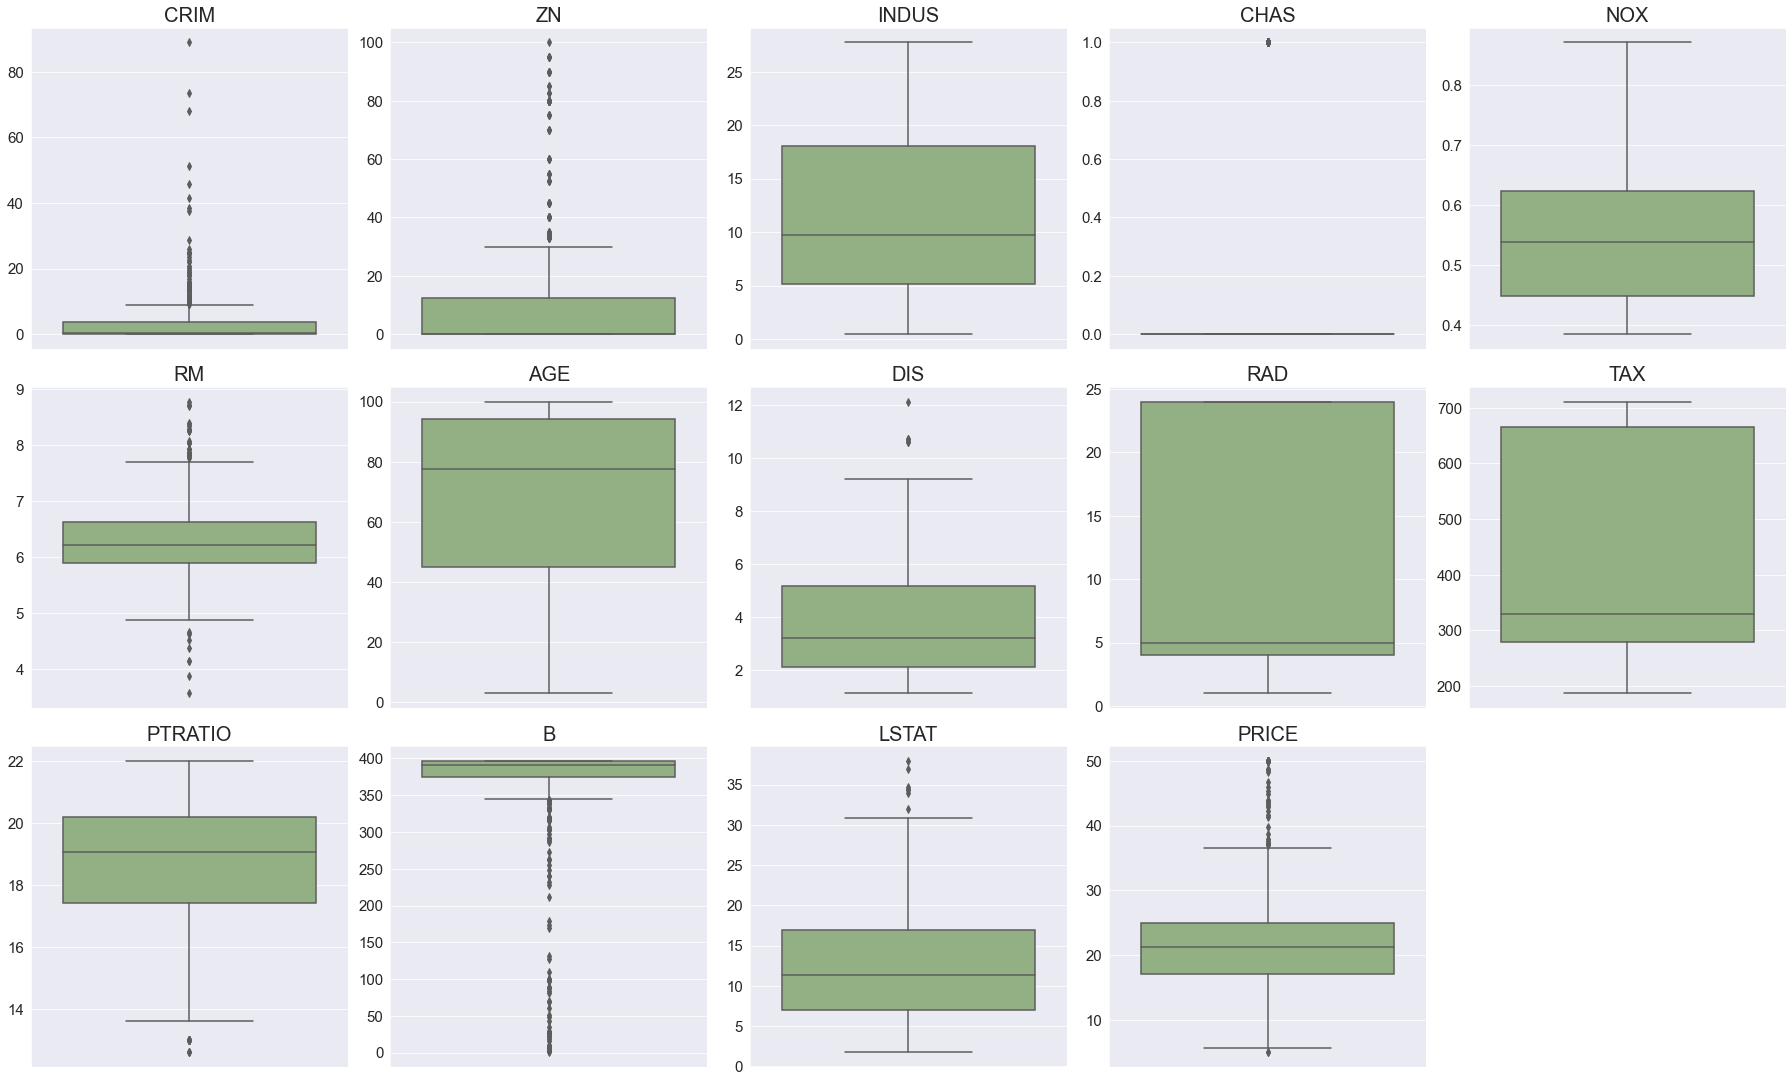

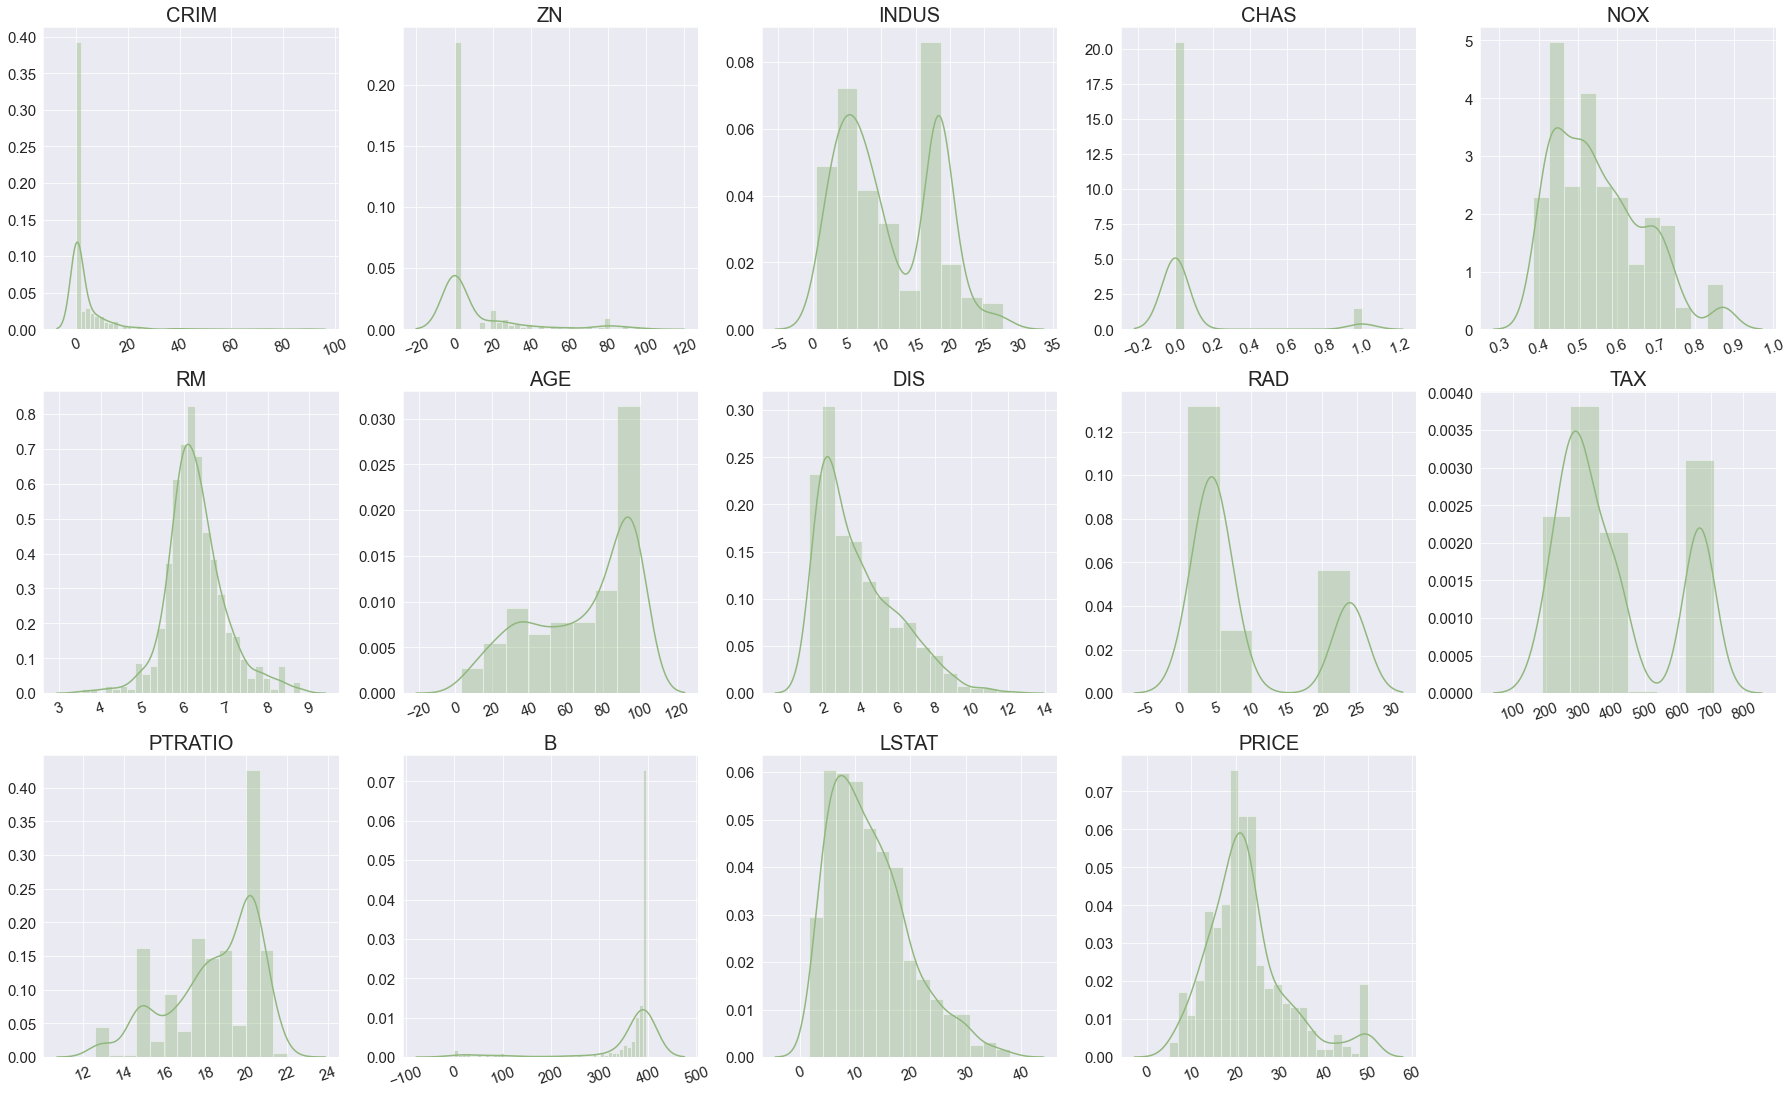

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# plot boxplot
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df.columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = df[col], color = '#90B77D')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    i += 1
plt.show()

# plot histplot
fig = plt.figure(figsize = (25, 25))
i = 1
for col in df.columns:
    plt.subplot(5, 5, i)
    ax = sns.distplot(x = df[col], color = '#90B77D')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    i += 1
plt.show()

display(df.describe())

## Plot each feature vs target variable

- `CRIM`, `RM`, `LSTAT` are somewhat having a linear relationship with `PRICE` while the others don't seem linearly correlated.

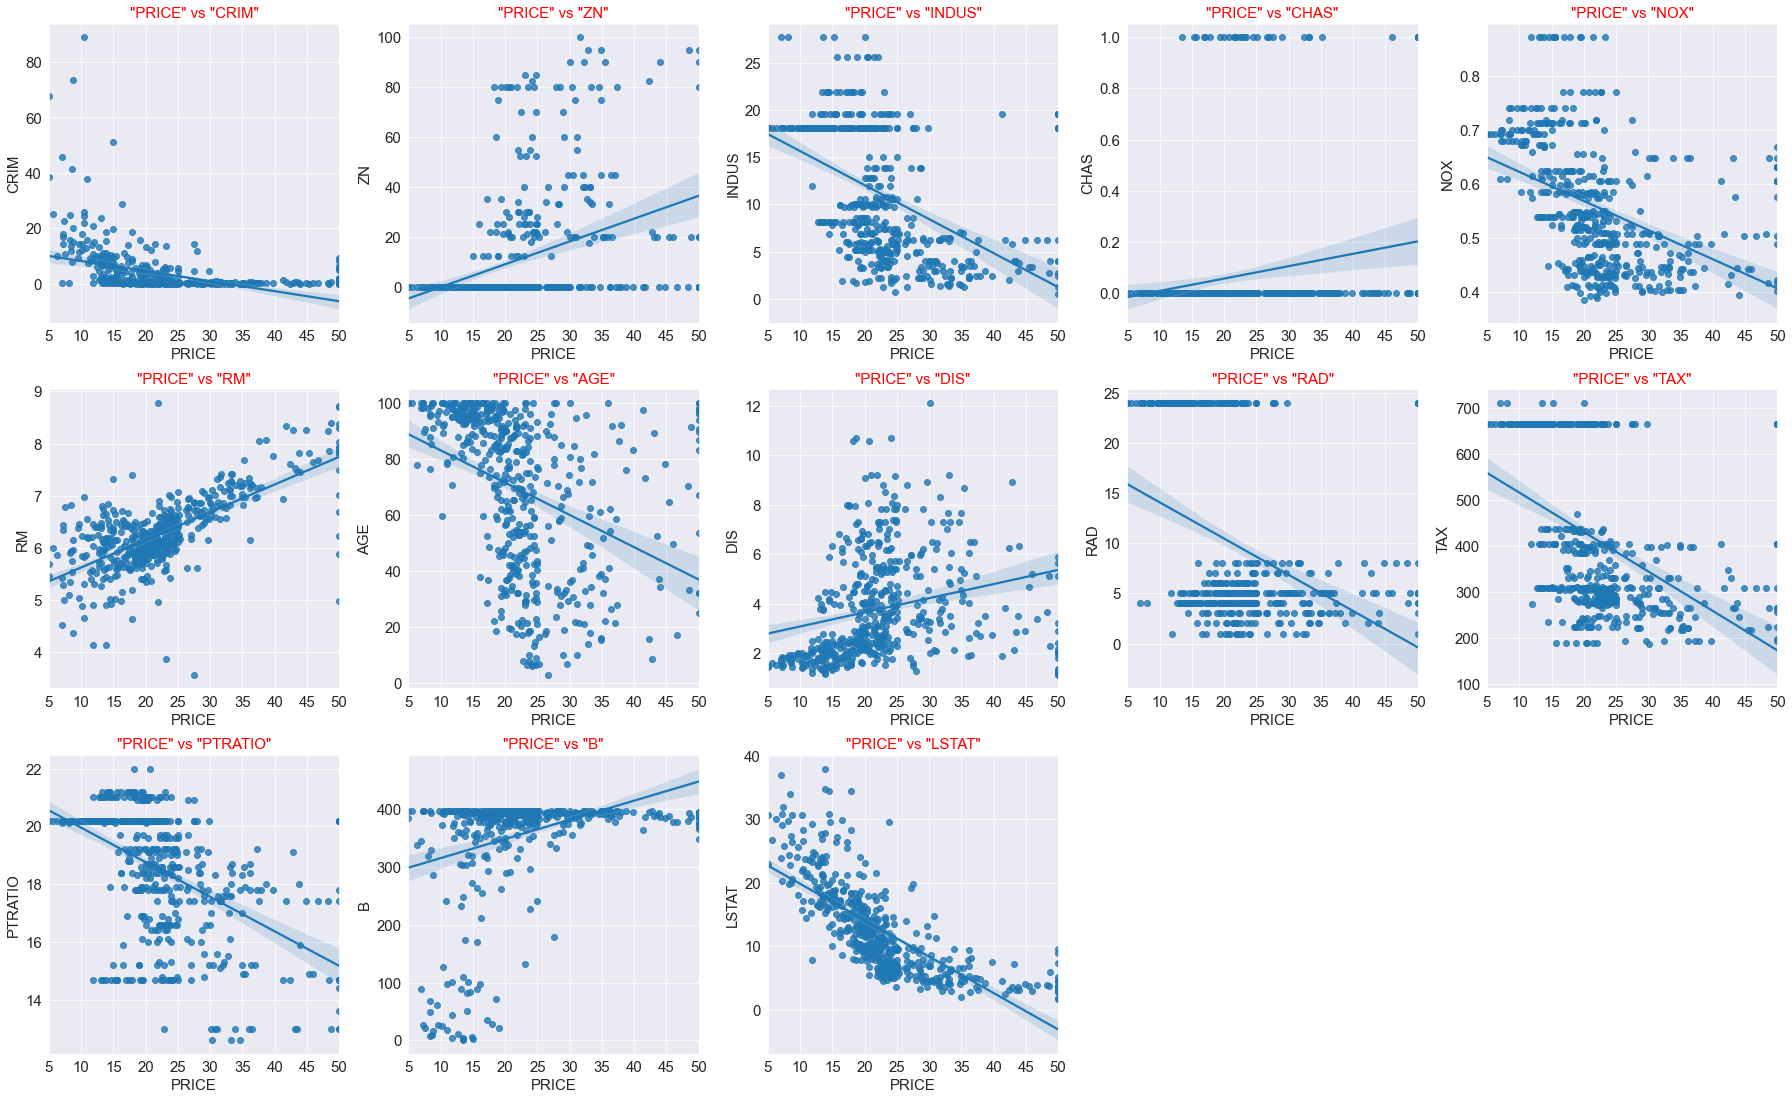

In [7]:
# scatter plot of feature vs target variable
fig = plt.figure(figsize = (25, 25))
i = 1
for col in [col for col in df.columns if col not in ['PRICE']]:
    plt.subplot(5, 5, i)
    ax = sns.regplot(x = 'PRICE', y = col, data = df)

    plt.title('"PRICE" vs "%s"'%(col), loc = 'center', fontsize = 15, color = 'red')
    plt.xticks(fontsize = 15); plt.yticks(fontsize = 15)
    plt.xlabel('PRICE', fontsize = 15); plt.ylabel(col, fontsize = 15);
    
    plt.tight_layout()
    i += 1
plt.show()

## Correlation and FIV to check multicollinearity features

By using correlation plot, we can check whether there are multicollinearity features in our dataset or not. What is multicollinearity? Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. This will lead to misleading interpretation of the coefficients in Linear Regression (read this [blog](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/) for more information about multicollinearity). For practical purpose in order to find multicollinearity features using pearson correlation, we can use correlation threshold value to be `0.8`.

We also will use another method to detect multicollinearity, that is Variable Inflation Factors (VIF). This [blog](https://www.datasklr.com/ols-least-squares-regression/multicollinearity) provides how to compute multicollinearity using Variable Inflation Factors (VIF). Here are some brief explanations about VIF.

> "VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable."  
>"VIF score of an independent variable represents how well the variable is explained by other independent variables."

Rule of thumb for VIF (reference from *An Introduction to Statistical Learning: With Applications in R* book):
- VIF starts at 1 and has no upper limit.
- VIF = `1` &rarr; No multicollinearity.
- VIF > `5` &rarr; Moderate multicollinearity.
- VIF > `10` &rarr; Severe multicollinearity.

In [8]:
# helper function to check multicollinearity features
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
def check_multicol(X, show_plot, fig_size = (12, 8)):
    # calculating VIF
    X_temp = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["features"] = X_temp.columns
    vif["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]
    
    if show_plot:
        # correlation heatmap plot  
        fig, ax = plt.subplots(figsize = fig_size)
        corr_matrix = X.corr()
        mask = np.zeros_like(corr_matrix)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'bwr', linewidths = 0.1,  
                    mask = mask, square = True, vmax = 1, vmin = -1)
        ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, ha = 'right', rotation = 45)
        ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, va = 'center', rotation = 0)
        ax.set(xlabel = None, ylabel = None)
        plt.show()
    return vif.sort_values(by = 'VIF', ascending = False).round(2)

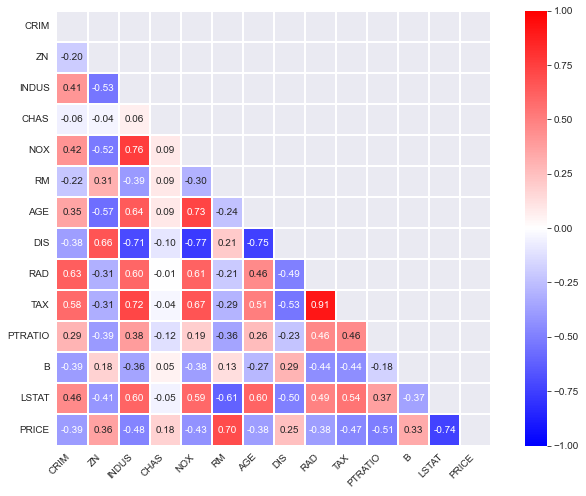

,features,VIF
0,const,645.98
10,TAX,9.21
9,RAD,7.81
5,NOX,4.59
8,DIS,4.40
3,INDUS,3.99
14,PRICE,3.86
13,LSTAT,3.58
7,AGE,3.10
2,ZN,2.35


In [9]:
# compute VIF
vif = check_multicol(df, show_plot = True)
vif

**Insights**:
- From the resulting correlation plot, we see that `RAD` and `TAX` are highly correlated each other with pearson correlation value up to `0.91`. So we have collinearity features between `RAD` and `TAX`. This is also confirmed by the high values of FIV which is up to `7.81` for `RAD` and `9.21` for `TAX` (moderate multicollinearity). Since `TAX` has the highest correlation to our target variable `PRICE` compared to `RAD`, then we will **drop** `RAD` and **hold** `TAX`.

In [10]:
# VIF after drop 'RAD'
vif = check_multicol(df.drop('RAD', axis = 1), show_plot = False)
vif

,features,VIF
0,const,576.63
5,NOX,4.44
8,DIS,4.39
13,PRICE,3.70
3,INDUS,3.69
12,LSTAT,3.53
9,TAX,3.42
7,AGE,3.08
2,ZN,2.31
6,RM,2.25


In [11]:
# drop 'RAD'
features_cleaned = [col for col in df.columns if col not in ['RAD']]
df = df[features_cleaned]

# Preprocessing

- Split the data into train and test set with 0.3 ratio on test set.
- Scale the features implicitly using `sklearn.pipeline`.

In [12]:
# split the data into train and test sets (again)
X = df.drop('PRICE', axis = 1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 12) (354,)
(152, 12) (152,)


# Feature selection

## Lasso regression

The difference between lasso regression and linear regression are in the pre-defined loss function. For lasso regression, we add a regularization term in the least squared cost function while in linear regression there isn't any regularization term. The regularization term of lasso (L1) can shrink the coefficients of the hypothesis function to zero in which lasso will penalize the irrelevant coefficient heavily. This algorithm can be used as feature selection method.

In [13]:
# find the best features using lasso regression
pl_lasso  = Pipeline([('scaler', MinMaxScaler()),
                       ('regressor', Lasso(alpha = 0.1))])
pl_lasso.fit(X_train, y_train)
coef_df = pd.DataFrame({'feature':X_train.columns, 'coef':pl_lasso[1].coef_})
coef_df.sort_values('coef')

,feature,coef
11,LSTAT,-20.504599
9,PTRATIO,-6.861815
7,DIS,-1.118916
8,TAX,-0.418235
0,CRIM,-0.000000
1,ZN,0.000000
2,INDUS,-0.000000
4,NOX,-0.000000
6,AGE,-0.000000
3,CHAS,2.852221


Insights:
- Based on lasso coefficients, `CRIM`, `ZN`, `INDUS`, `NOX` and `AGE` are not important features. So we will drop this.

In [14]:
# get the best features from lasso regression
features_lasso = [col for col in features_cleaned if col not in ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PRICE']]
features_lasso

['CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

## Sequential Feature Selection with Backward Elimination

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features most relevant to the problem. The picture below is the workflow of [Sequential Feature Selection with Backward Elimination](http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/). We will use `mlxtend` library which has predifined algorithm to perform this process.

<img src="image/sequential backward selection process.jpg" width="500">

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.7432927716711957, 0.5005479472673127, 0.744...",0.679917,"(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, TAX...",0.13117,0.102054,0.051027
11,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11)","[0.7429586789986364, 0.5184028050459043, 0.743...",0.682698,"(CRIM, ZN, INDUS, CHAS, NOX, RM, DIS, TAX, PTR...",0.123139,0.095806,0.047903
10,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11)","[0.7462673410190086, 0.510951791357406, 0.7405...",0.68403,"(CRIM, INDUS, CHAS, NOX, RM, DIS, TAX, PTRATIO...",0.131467,0.102286,0.051143
9,"(0, 3, 4, 5, 7, 8, 9, 10, 11)","[0.7487646595405946, 0.510592570079456, 0.7421...",0.685192,"(CRIM, CHAS, NOX, RM, DIS, TAX, PTRATIO, B, LS...",0.132442,0.103044,0.051522
8,"(0, 3, 4, 5, 7, 9, 10, 11)","[0.7465283919463033, 0.512688535044707, 0.7451...",0.684482,"(CRIM, CHAS, NOX, RM, DIS, PTRATIO, B, LSTAT)",0.131508,0.102318,0.051159
7,"(0, 3, 4, 5, 7, 9, 11)","[0.7390258744783527, 0.5300006353501878, 0.735...",0.68223,"(CRIM, CHAS, NOX, RM, DIS, PTRATIO, LSTAT)",0.118389,0.092111,0.046055
6,"(0, 4, 5, 7, 9, 11)","[0.7302506305928695, 0.5613425236924854, 0.717...",0.67771,"(CRIM, NOX, RM, DIS, PTRATIO, LSTAT)",0.108064,0.084077,0.042039
5,"(0, 5, 7, 9, 11)","[0.7346293935122753, 0.5673101734866115, 0.701...",0.670744,"(CRIM, RM, DIS, PTRATIO, LSTAT)",0.104923,0.081634,0.040817
4,"(5, 7, 9, 11)","[0.7209392269075078, 0.5397121584278559, 0.700...",0.661574,"(RM, DIS, PTRATIO, LSTAT)",0.1065,0.082861,0.041431
3,"(5, 9, 11)","[0.7281950684898155, 0.5186630863283066, 0.678...",0.651401,"(RM, PTRATIO, LSTAT)",0.111927,0.087083,0.043542


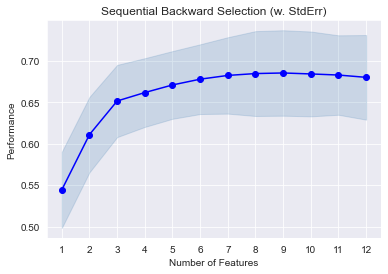

In [15]:
# find the best features using SFS with backward elimination
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

pl_SFSBE = Pipeline([('scaler', MinMaxScaler()),
                     ('regressor', LinearRegression())])
sfs = SFS(pl_SFSBE, 
          k_features = 'best', 
          forward = False, 
          floating = True, 
          verbose = 0,
          scoring = 'r2',
          cv = 5)

sfs = sfs.fit(X_train, y_train, custom_feature_names = X_train.columns)
results_SFS =  pd.DataFrame.from_dict(sfs.get_metric_dict()).T
display(results_SFS)

fig = plot_sfs(sfs.get_metric_dict(), kind = 'std_err')
plt.title('Sequential Backward Selection (w. StdErr)')
plt.show()

In [16]:
# get the best features from SFS with backward elimination
features_SFSBE = list(sfs.k_feature_names_)
print('best score: %s \nusing features:\n%s'%(sfs.k_score_, features_SFSBE))

best score: 0.685192352922595 
using features:
['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# Modelling

## Train the model

In [17]:
# helper function to evaluate the model
def model_eval(model, name, plot_result):
    # model performances metrics
    print('='*40, name,'='*40)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('R2 train set:', r2_score(y_train, y_pred_train).round(3))
    print('R2 test set:', r2_score(y_test, y_pred_test).round(3))
    print('RMSE test set: ', mean_squared_error(y_test, y_pred_test, squared = False).round(3))
    print('MAE test set: ', mean_absolute_error(y_test, y_pred_test).round(3))
    
    # plot the actual vs predicted values, the residual error, and residual error distribution
    if plot_result:
        fig, ax = plt.subplots(figsize = (17, 5), nrows = 1, ncols = 3)
        
        ax[0].scatter(y_test, y_pred_test, label = 'Test set', alpha = 0.8)
        ax[0].scatter(y_train, y_pred_train, label = 'Train set', alpha = 0.4)
        ax[0].plot([0, 50], [0, 50], '--k')
        ax[0].set_xlabel('Actual Prices', fontsize = 12)
        ax[0].set_ylabel('Predicted Prices', fontsize = 12)
        ax[0].set_title("Actual Boston House Prices vs. Predicted in $1000's", fontsize = 12)

        ax[1].scatter(y_pred_test, y_pred_test - y_test, label = 'Test set', alpha = 0.8)
        ax[1].scatter(y_pred_train, y_pred_train - y_train, label = 'Train set', alpha = 0.4)
        ax[1].set_xlabel('Predicted Prices', fontsize = 12)
        ax[1].set_ylabel('Residual Errors', fontsize = 12)
        ax[1].set_title('Residuals', fontsize = 12)
        ax[1].hlines(0, xmin = -10, xmax = 60, linewidth = 1)

        ax[2].hist(y_pred_test - y_test, label = 'Test set', alpha = 0.8 )
        ax[2].hist(y_pred_train - y_train, label = 'Train set', alpha = 0.4)
        ax[2].set_title('Residual Errors Distribution', fontsize = 12)
        plt.axis('tight')
        ax[0].legend(); ax[1].legend(); ax[2].legend()
        plt.show()
    return None

In [18]:
# train the model using 'features_lasso'
pl_features_lasso = Pipeline([('features_lasso', FunctionTransformer(lambda x: x[features_lasso], validate = False)),
                              ('scaler', MinMaxScaler()),
                              ('regressor', LinearRegression(n_jobs = -1))])
pl_features_lasso.fit(X_train, y_train)
model_eval(model = pl_features_lasso, 
           name = 'pl_features_lasso', 
           plot_result = False)

======================================== pl_features_lasso ========================================
R2 train set: 0.721
R2 test set: 0.668
RMSE test set:  4.977
MAE test set:  3.305


In [19]:
# train the model using 'features_SFSBE'
pl_features_SFSBE = Pipeline([('features_SFSBE', FunctionTransformer(lambda x: x[features_SFSBE], validate = False)),
                              ('scaler', MinMaxScaler()),
                              ('regressor', LinearRegression(n_jobs = -1))])
pl_features_SFSBE.fit(X_train, y_train)
model_eval(model = pl_features_SFSBE, 
           name = 'pl_features_SFSBE', 
           plot_result = False)

======================================== pl_features_SFSBE ========================================
R2 train set: 0.734
R2 test set: 0.68
RMSE test set:  4.886
MAE test set:  3.319


- Look like using "Sequential Feature Selection with Backward Elimination"  gives the better performance compared to "Lasso Regression".
- Both model seems overfitting the train set. Regularization term will handle this later.

## Feature engineering

In [20]:
# helper function to compare 2 plots
def compare_plots(feature_1, feature_2):
    fig, ax = plt.subplots(figsize = (8, 4), ncols = 2, nrows = 1)
    sns.regplot(x = 'PRICE', y = feature_1, data = df, ax = ax[0])
    sns.regplot(x = 'PRICE', y = feature_2, data = df, ax = ax[1])
    ax[0].set_title(feature_1, fontsize = 15)
    ax[1].set_title(feature_2, fontsize = 15)
    plt.show()
    p_corr = df[[feature_1, feature_2, 'PRICE']].corr()['PRICE']
    print('Pearson-Correlation with PRICE:\n%s'%(p_corr))
    if abs(p_corr[1]) > abs(p_corr[0]):
        print('*** GOOD CANDIDATE ***')

### Log transformation

Apply log transformation to all features and select those features in which their correlation with `PRICE` is increasing.

================================================== NOX ==================================================


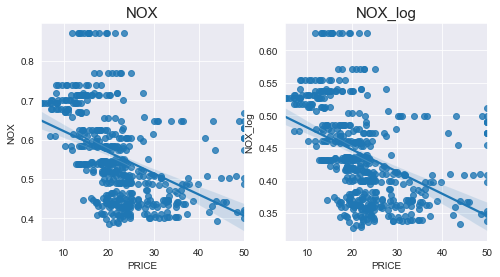

Pearson-Correlation with PRICE:
NOX       -0.427321
NOX_log   -0.429563
PRICE      1.000000
Name: PRICE, dtype: float64
*** GOOD CANDIDATE ***
================================================== CRIM ==================================================


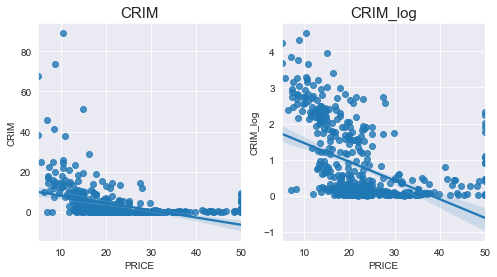

Pearson-Correlation with PRICE:
CRIM       -0.388305
CRIM_log   -0.464084
PRICE       1.000000
Name: PRICE, dtype: float64
*** GOOD CANDIDATE ***
================================================== RM ==================================================


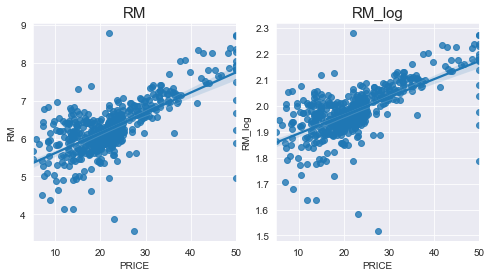

Pearson-Correlation with PRICE:
RM        0.695360
RM_log    0.666174
PRICE     1.000000
Name: PRICE, dtype: float64
================================================== LSTAT ==================================================


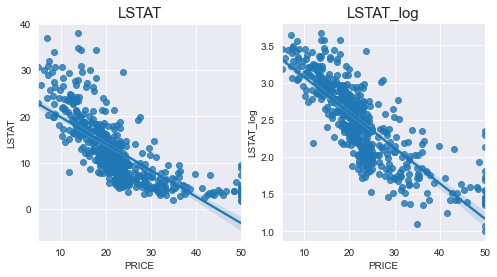

Pearson-Correlation with PRICE:
LSTAT       -0.737663
LSTAT_log   -0.810753
PRICE        1.000000
Name: PRICE, dtype: float64
*** GOOD CANDIDATE ***
================================================== DIS ==================================================


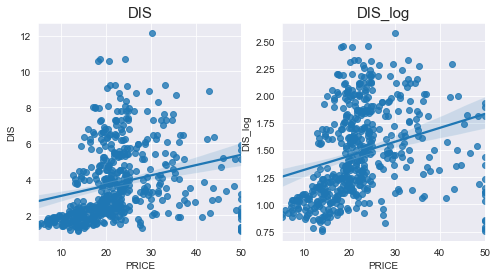

Pearson-Correlation with PRICE:
DIS        0.249929
DIS_log    0.285721
PRICE      1.000000
Name: PRICE, dtype: float64
*** GOOD CANDIDATE ***
================================================== TAX ==================================================


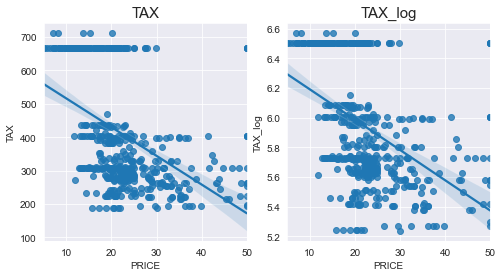

Pearson-Correlation with PRICE:
TAX       -0.468536
TAX_log   -0.474698
PRICE      1.000000
Name: PRICE, dtype: float64
*** GOOD CANDIDATE ***
================================================== PTRATIO ==================================================


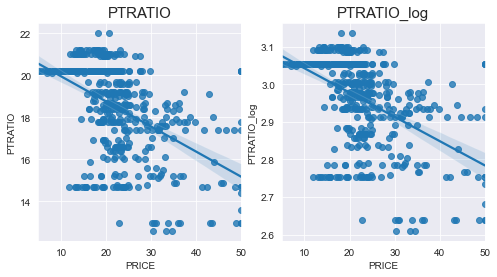

Pearson-Correlation with PRICE:
PTRATIO       -0.507787
PTRATIO_log   -0.503448
PRICE          1.000000
Name: PRICE, dtype: float64
================================================== CHAS ==================================================


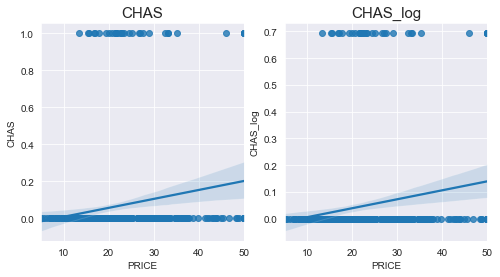

Pearson-Correlation with PRICE:
CHAS        0.17526
CHAS_log    0.17526
PRICE       1.00000
Name: PRICE, dtype: float64
================================================== B ==================================================


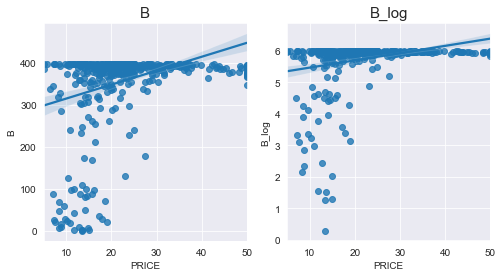

Pearson-Correlation with PRICE:
B        0.333461
B_log    0.290198
PRICE    1.000000
Name: PRICE, dtype: float64


In [21]:
# perform log transformation
for col in list(set(features_lasso + features_SFSBE)):
    print('='*50, col, '='*50)
    df['{}_log'.format(col)] = df[col].apply(lambda x: np.log(x + 1))
    compare_plots(col, '{}_log'.format(col))

Insights:
- We found that log of `TAX`, `DIS`, `CRIM`, `LSTAT`, and `NOX` have better relationships (higher corrleation) with `PRICE`.
- We can use this features as the new features of linear regression. Perhaps the model performance could be improved with these new features.

In [22]:
# split the data into train and test sets (again)
X = df.drop('PRICE', axis = 1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 21) (354,)
(152, 21) (152,)


In [23]:
# assign the new features from feature engineering
new_features = ['TAX_log', 'DIS_log', 'CRIM_log', 'LSTAT_log', 'NOX_log']
features_lasso_new = ['CHAS', 'RM', 'DIS_log', 'TAX_log', 'PTRATIO', 'B', 'LSTAT_log']
features_SFSBE_new = ['CRIM_log', 'CHAS', 'NOX_log', 'RM', 'DIS_log', 'TAX_log', 'PTRATIO', 'B', 'LSTAT_log']

## Train the model using new features

In [24]:
# train the model using 'features_lasso_new'
pl_features_lasso_new = Pipeline([('features_lasso_new', FunctionTransformer(lambda x: x[features_lasso_new], validate = False)),
                                  ('scaler', MinMaxScaler()),
                                  ('regressor', LinearRegression(n_jobs = -1))])
pl_features_lasso_new.fit(X_train, y_train)
model_eval(model = pl_features_lasso_new, 
           name = 'pl_features_lasso', 
           plot_result = False)

======================================== pl_features_lasso ========================================
R2 train set: 0.779
R2 test set: 0.735
RMSE test set:  4.441
MAE test set:  3.038


In [25]:
# train the model using 'features_SFSBE_new'
pl_features_SFSBE_new = Pipeline([('features_SFSBE_new', FunctionTransformer(lambda x: x[features_SFSBE_new], validate = False)),
                                  ('scaler', MinMaxScaler()),
                                  ('regressor', LinearRegression(n_jobs = -1))])
pl_features_SFSBE_new.fit(X_train, y_train)
model_eval(model = pl_features_SFSBE_new, 
           name = 'pl_features_SFSBE_new', 
           plot_result = False)

======================================== pl_features_SFSBE_new ========================================
R2 train set: 0.785
R2 test set: 0.752
RMSE test set:  4.297
MAE test set:  2.984


Insights:
- Our model has improved now! without feature engineering the `R2` score on the test set is around `0.668` and `0.68` while with feature engineering the `R2` score on the test set is around `0.735` and `0.752`. It also applies to `RMSE` and `MAE` scores.
- We will use features from "Sequential Feature Selection with Backward Elimination" since it gives us better performance. 
    - The features is saved as `features_SFSBE_new` variable.
    - The best model is saved as `pl_features_SFSBE_new` object.

## Add regularization term

Since our best model, `pl_features_SFSBE_new`, is slightly overfitting the training set, we will handle it by adding regularization term to the cost function. We use Ridge and Lasso Regression to add a regularization term in Linear Regression OLS cost function. Then, we will find the best regularization strength value for both Lasso and Ridge Regression using `GridSearchCV` method.

In [26]:
# find the best regularization parameter using 'GridSearchCV' on Ridge Regression
ridge_params = {'ridge__alpha':np.logspace(-1, 1, 100)}
pl_ridge = Pipeline([('features_SFSBE_new', FunctionTransformer(lambda x: x[features_SFSBE_new], validate = False)),
                     ('scaler', MinMaxScaler()),
                     ('ridge', Ridge())])
GS_pl_ridge = GridSearchCV(pl_ridge, 
                           ridge_params, 
                           cv = 5, n_jobs = -1, scoring = 'r2')
GS_pl_ridge.fit(X_train, y_train)
print(GS_pl_ridge.best_params_)

model_eval(model = GS_pl_ridge, 
           name = 'GS_pl_ridge', 
           plot_result = False)
print('CV scores (R2):', GS_pl_ridge.best_score_.round(3))

{'ridge__alpha': 0.8497534359086445}
======================================== GS_pl_ridge ========================================
R2 train set: 0.783
R2 test set: 0.748
RMSE test set:  4.331
MAE test set:  2.935
CV scores (R2): 0.743


In [27]:
# find the best regularization parameter using 'GridSearchCV' on Lasso Regression
lasso_params = {'lasso__alpha':np.logspace(-1, 1, 100)}
pl_lasso = Pipeline([('features_SFSBE_new', FunctionTransformer(lambda x: x[features_SFSBE_new], validate = False)),
                     ('scaler', MinMaxScaler()),
                     ('lasso', Lasso())])
GS_pl_lasso = GridSearchCV(pl_lasso, 
                           lasso_params, 
                           cv = 5, n_jobs = -1, scoring = 'r2')
GS_pl_lasso.fit(X_train, y_train)
print(GS_pl_lasso.best_params_)

model_eval(model = GS_pl_lasso, 
           name = 'GS_pl_lasso', 
           plot_result = False)
print('CV scores (R2):', GS_pl_lasso.best_score_.round(3))

{'lasso__alpha': 0.1}
======================================== GS_pl_lasso ========================================
R2 train set: 0.762
R2 test set: 0.717
RMSE test set:  4.596
MAE test set:  3.188
CV scores (R2): 0.723


Insights:
- Look like after adding regularization term the model is still slightly overfitting the train set.
- We are gonna still use the Liner Regression without regularization as the final model since after regularization applied, the model performance decreases a bit.

# Interpretations

- House prices in Boston are mostly influenced by features such as `RM`, `LSTAT_log` and `DIS_log`.
- `RM` is the highest positive coefficient parameter that affect house prices in Boston while `LSTAT_log` is the highest negative coefficient.
- The y-intercept can be interpreted that in general the starting price of a house in Boston would be around 39K USD.
- Coefficient interpretation example:
    - An increase of 1 point in `RM`, while the other features are kept fixed, then the house price, `PRICE`, increases by 14.964 point which means 14.964K USD.
    - An increase of 1 point of log value in `LSTAT_log`, while the other features are kept fixed, then the house price, `PRICE`, decreases by -26.965 point which means -26.965K USD.
- One thing for sure, `RM` will be the main positive feature which greatly affect in increasing of house prices in Boston. This seems reasonable for typical house prices. 
- `LSTAT_log` will be the main negative feature which greatly affect in decreasing of house prices in Boston.

=================================== Before Feature Engineering ====================================
======================================== pl_features_SFSBE ========================================
R2 train set: 0.734
R2 test set: 0.68
RMSE test set:  4.886
MAE test set:  3.319


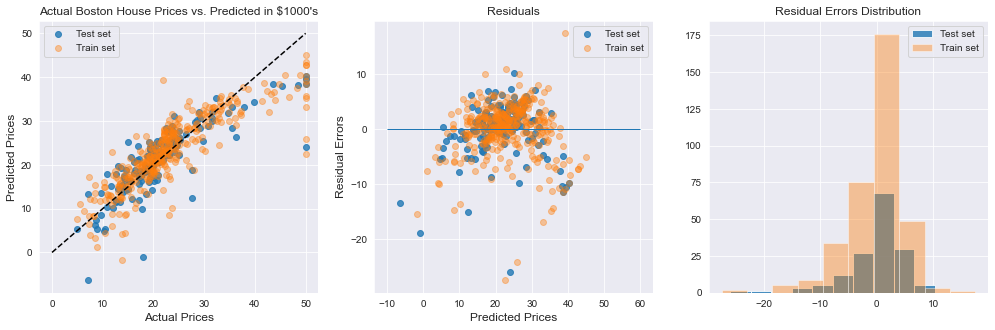

   feature  coefficient  intercept
3       RM    21.159574  24.564315
7        B     4.363820  24.564315
1     CHAS     3.535789  24.564315
5      TAX     1.681747  24.564315
2      NOX    -7.595313  24.564315
0     CRIM    -8.523443  24.564315
6  PTRATIO    -8.731469  24.564315
4      DIS   -11.967150  24.564315
8    LSTAT   -19.999250  24.564315

====================================== After Feature Engineering ======================================
======================================== pl_features_SFSBE_new ========================================
R2 train set: 0.785
R2 test set: 0.752
RMSE test set:  4.297
MAE test set:  2.984


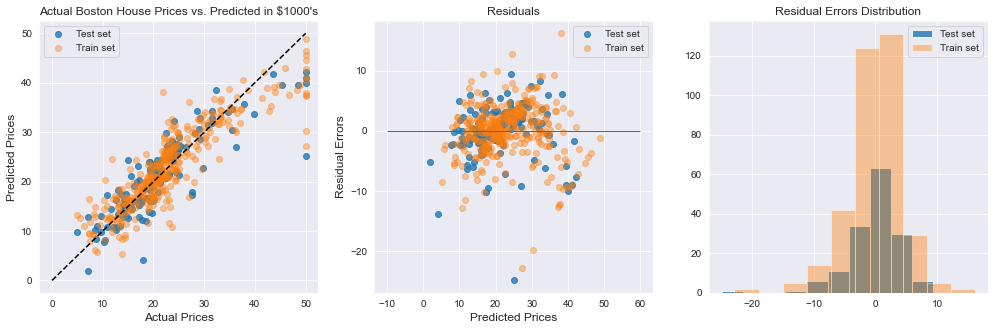

     feature  coefficient  intercept
3         RM    14.964106  39.029635
7          B     3.592948  39.029635
1       CHAS     2.975030  39.029635
5    TAX_log    -0.999297  39.029635
0   CRIM_log    -1.006078  39.029635
2    NOX_log    -6.507375  39.029635
6    PTRATIO    -6.869169  39.029635
4    DIS_log   -12.523771  39.029635
8  LSTAT_log   -26.965875  39.029635


In [28]:
# compare the model before and after feature engineering
print('='*35, 'Before Feature Engineering', '='*36)
model_eval(model = pl_features_SFSBE, 
           name = 'pl_features_SFSBE', 
           plot_result = True)
coef_1 = pd.DataFrame({'feature':features_SFSBE, 'coefficient':pl_features_SFSBE[-1].coef_, 'intercept':pl_features_SFSBE[-1].intercept_})
print(coef_1.sort_values('coefficient', ascending = False))
print()

print('='*38, 'After Feature Engineering', '='*38)
model_eval(model = pl_features_SFSBE_new, 
           name = 'pl_features_SFSBE_new', 
           plot_result = True)
coef_2 = pd.DataFrame({'feature':features_SFSBE_new, 'coefficient':pl_features_SFSBE_new[-1].coef_, 'intercept':pl_features_SFSBE_new[-1].intercept_})
print(coef_2.sort_values('coefficient', ascending = False))

# Conclusions

- We have built Linear Regression model to estimate the house prices in Boston. "Sequential Feature Selection with Backward Elimination" is used as feature selection method since it gives better model performance compared to "Lasso Regression". After performing feature engineering with simple log transformation technique, we can get better model performance, i.e. `R2` score of `0.68` to `0.752`.
- From the plot of actual prices vs predicted prices of the best model, we see that most of the data points are lying around the linear line connecting between actual prices and predicted prices. As the actual prices around 50, the predicted prices are always at below 50. This could be outlier data points in which the model can't learn this data points easily by linear relationships.
- From the residual plot and residual distribution of the best model, it looks like that the residual errors tend to be normally distributed to the 0 value but it still has several outliers. The closer we can get the data points to be at the 0 line, the more accurate the model is at predicting the prices.
- With an `R2` score of `0.752`, our model is not terrible at all but it's not perfect too. There is still a lot of things we can do to improve this model such as,
    - Gather more data.
    - Gather more features.
    - Create more new engineered features like polynomial features.
    - Remove outiers.
    - Implement more advanced and complex ML algorithm like Bagging, Boosting or Deep Learning.

# Bonus: train the model using xgboost, catboost, random forest, and adaboost

======================================== pl_xgboost ========================================
R2 train set: 1.0
R2 test set: 0.887
RMSE test set:  2.907
MAE test set:  2.043


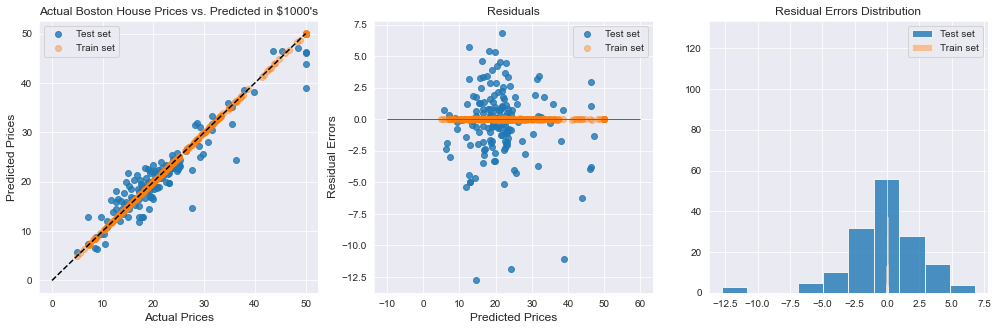

In [29]:
from xgboost import XGBRegressor

# train the model using 'XGBRegressor'
pl_xgboost = Pipeline([('features_SFSBE_new', FunctionTransformer(lambda x: x[features_SFSBE_new], validate = False)),
                       ('regressor', XGBRegressor())])
pl_xgboost.fit(X_train, y_train)
model_eval(model = pl_xgboost, 
           name = 'pl_xgboost', 
           plot_result = True)

======================================== pl_catboost ========================================
R2 train set: 0.996
R2 test set: 0.879
RMSE test set:  3.005
MAE test set:  2.023


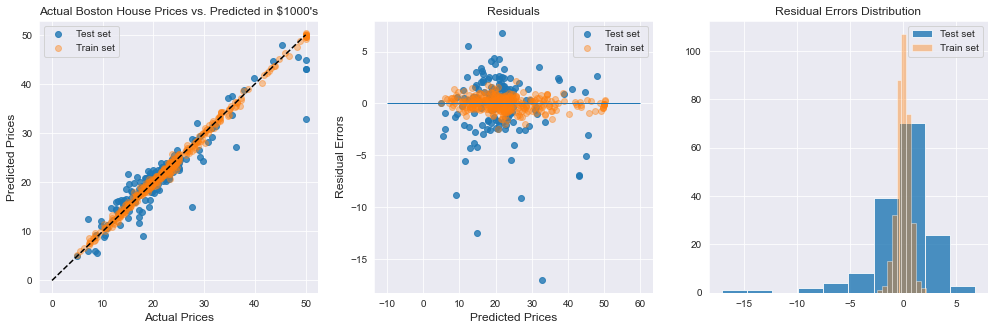

In [30]:
from catboost import CatBoostRegressor

# train the model using 'CatBoostRegressor'
pl_catboost = Pipeline([('features_SFSBE_new', FunctionTransformer(lambda x: x[features_SFSBE_new], validate = False)),
                        ('regressor', CatBoostRegressor(verbose = 0))])
pl_catboost.fit(X_train, y_train)
model_eval(model = pl_catboost, 
           name = 'pl_catboost', 
           plot_result = True)

======================================== pl_random_forest ========================================
R2 train set: 0.977
R2 test set: 0.866
RMSE test set:  3.157
MAE test set:  2.128


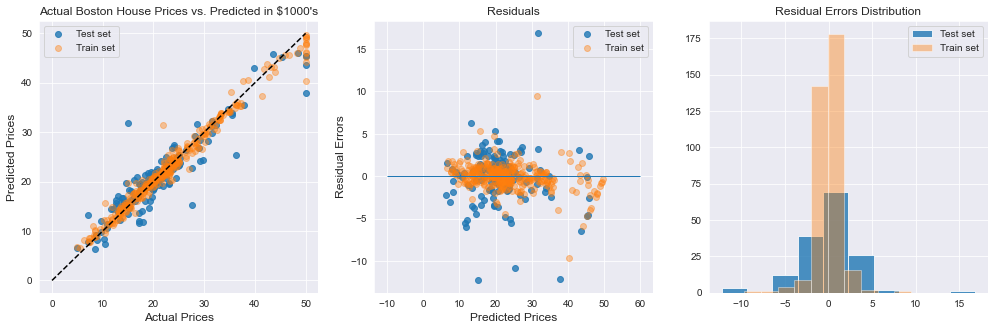

In [31]:
from sklearn.ensemble import RandomForestRegressor

# train the model using 'RandomForestRegressor'
pl_random_forest = Pipeline([('features_SFSBE_new', FunctionTransformer(lambda x: x[features_SFSBE_new], validate = False)),
                             ('regressor', RandomForestRegressor(n_estimators = 100, random_state = 42))])
pl_random_forest.fit(X_train, y_train)
model_eval(model = pl_random_forest, 
           name = 'pl_random_forest', 
           plot_result = True)

======================================== pl_adaboost ========================================
R2 train set: 0.918
R2 test set: 0.81
RMSE test set:  3.759
MAE test set:  2.675


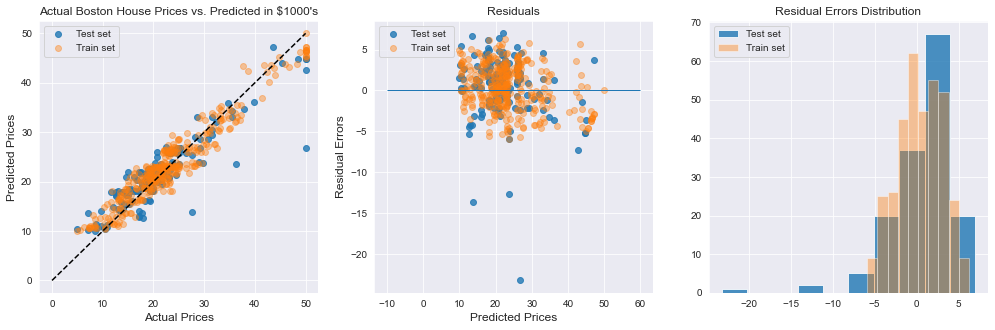

In [32]:
from sklearn.ensemble import AdaBoostRegressor

# train the model using 'AdaBoostRegressor'
pl_adaboost = Pipeline([('features_SFSBE_new', FunctionTransformer(lambda x: x[features_SFSBE_new], validate = False)),
                        ('regressor', AdaBoostRegressor(n_estimators = 100))])
pl_adaboost.fit(X_train, y_train)
model_eval(model = pl_adaboost, 
           name = 'pl_adaboost', 
           plot_result = True)

# References
1. [What is Multicollinearity? Here’s Everything You Need to Know](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)
2. [Multicollinearity](https://www.datasklr.com/ols-least-squares-regression/multicollinearity)
3. [How to use Residual Plots for regression model validation?](https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378)
